In [1]:
def tree_starts(T):
    in_degree_zero_list = []
    for tup in list(T.in_degree()):
        if tup[1] == 0:
            in_degree_zero_list.append(tup[0])
    return in_degree_zero_list

In [2]:
def tree_lengths(T):
    tree_lengths = []
    for i in tree_starts(T):
        j = 0
        while len(list(nx.descendants_at_distance(nx.bfs_tree(T, i), i, j))) != 0:
            j += 1
        tree_lengths.append(j)
    return tree_lengths

In [3]:
import math
def detection(T):
    detections = []
    tl = tree_lengths(T)
    ts = tree_starts(T)
    for i in range(len(ts)):
        j = 0
        while len(list(nx.descendants_at_distance(T, ts[i], j))) != 0:
            for node in nx.descendants_at_distance(T, ts[i], j):
                x=random.random()
                if 1/(1+math.exp(-x+j/tl[i]))>0.5:
                    detections.append(node)
            j += 1
    return detections

In [4]:
#UDD

import networkx as nx
import EoN as EoN
import matplotlib.pyplot as plt
from collections import defaultdict
import random

random.seed(3)

G = nx.configuration_model([3]*10000)
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.Graph(G)

node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}

nx.set_node_attributes(G, values=node_attribute_dict, name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict, name='transmission_weight')

N = G.order()
H = nx.DiGraph()

H.add_node('S') #This line is actually unnecessary since 'S' does not change status intrinsically
#
H.add_edge('E', 'I', rate = 0.5, weight_label='expose2infect_weight')
#  The line above states that the transition from 'E' to 'I' occurs with rate
#  0.5  times  whatever value is in the individual's attribute 'expose2infect_weight'
#
H.add_edge('I', 'R', rate = 0.14)
#  The line above states that the I to 'R' transition occurs with rate 0.1
#  and does not depend on any attribute

J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='transmission_weight')
#  The line above states that an 'I' individual will cause an 'S' individual
#  to transition to 'E' with rate equal to 0.5 times the partnership's attribute
#  'transmission_weight'.

rho = 1./N
IC = defaultdict(lambda: 'S')
for node in range(10):
    IC[node] = 'I'

return_statuses = ('S', 'E', 'I', 'R')
t,S,E,I,R = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = float('Inf'))

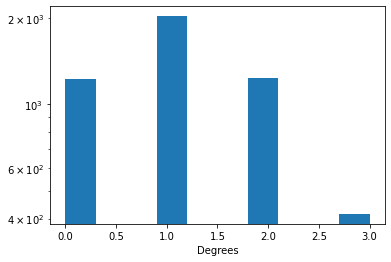

In [5]:
sim = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = float('Inf'), return_full_data = True)
T = sim.transmission_tree()
dets = detection(T)

for node in list(T.nodes()):
    if node not in dets:
        T.remove_node(node)
    
degrees = [T.degree(i) for i in T.nodes()]

# setup figures
fig = plt.figure()
ax2=fig.add_subplot()
ax2.hist(degrees)
ax2.set_yscale('log')
ax2.set_xlabel("Degrees")

plt.show()

In [6]:
#PLDD

random.seed(3)

sequence = nx.random_powerlaw_tree_sequence(10000, tries=1000000)
G = nx.configuration_model(sequence)
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.Graph(G)

node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}

nx.set_node_attributes(G, values=node_attribute_dict, name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict, name='transmission_weight')

N = G.order()
H = nx.DiGraph()

H.add_node('S') #This line is actually unnecessary since 'S' does not change status intrinsically
#
H.add_edge('E', 'I', rate = 0.5, weight_label='expose2infect_weight')
#  The line above states that the transition from 'E' to 'I' occurs with rate
#  0.5  times  whatever value is in the individual's attribute 'expose2infect_weight'
#
H.add_edge('I', 'R', rate = 0.14)
#  The line above states that the I to 'R' transition occurs with rate 0.1
#  and does not depend on any attribute

J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='transmission_weight')
#  The line above states that an 'I' individual will cause an 'S' individual
#  to transition to 'E' with rate equal to 0.5 times the partnership's attribute
#  'transmission_weight'.

rho = 1./N
IC = defaultdict(lambda: 'S')
for node in range(10):
    IC[node] = 'I'

return_statuses = ('S', 'E', 'I', 'R')
t,S,E,I,R = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = float('Inf'))

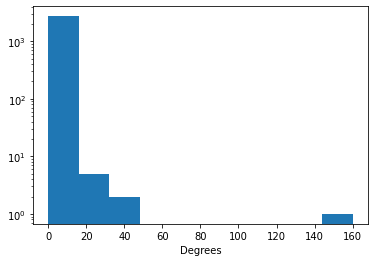

In [7]:
sim = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = float('Inf'), return_full_data = True)
T = sim.transmission_tree()
dets = detection(T)

for node in list(T.nodes()):
    if node not in dets:
        T.remove_node(node)
    
degrees = [T.degree(i) for i in T.nodes()]

# setup figures
fig = plt.figure()
ax2=fig.add_subplot()
ax2.hist(degrees)
ax2.set_yscale('log')
ax2.set_xlabel("Degrees")

plt.show()

In [8]:
import numpy as np
random.seed(3)
#PDD
sequence=[1]
while sum(sequence)%2==1:
    sequence = np.random.poisson(1,10000)+1
G = nx.configuration_model(sequence)
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.Graph(G)

node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}

nx.set_node_attributes(G, values=node_attribute_dict, name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict, name='transmission_weight')

N = G.order()
H = nx.DiGraph()

H.add_node('S') #This line is actually unnecessary since 'S' does not change status intrinsically
#
H.add_edge('E', 'I', rate = 0.5, weight_label='expose2infect_weight')
#  The line above states that the transition from 'E' to 'I' occurs with rate
#  0.5  times  whatever value is in the individual's attribute 'expose2infect_weight'
#
H.add_edge('I', 'R', rate = 0.14)
#  The line above states that the I to 'R' transition occurs with rate 0.1
#  and does not depend on any attribute

J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='transmission_weight')
#  The line above states that an 'I' individual will cause an 'S' individual
#  to transition to 'E' with rate equal to 0.5 times the partnership's attribute
#  'transmission_weight'.

rho = 1./N
IC = defaultdict(lambda: 'S')
for node in range(10):
    IC[node] = 'I'

return_statuses = ('S', 'E', 'I', 'R')
t,S,E,I,R = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = float('Inf'))

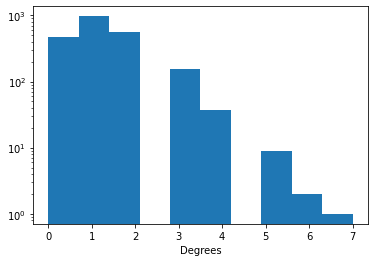

In [9]:
sim = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = float('Inf'), return_full_data = True)
T = sim.transmission_tree()
dets = detection(T)

for node in list(T.nodes()):
    if node not in dets:
        T.remove_node(node)
    
degrees = [T.degree(i) for i in T.nodes()]

# setup figures
fig = plt.figure()
ax2=fig.add_subplot()
ax2.hist(degrees)
ax2.set_yscale('log')
ax2.set_xlabel("Degrees")

plt.show()